# Sequential probability ratio test for simple random samples

We use the sequential testing procedure from Weiss (1962). To test the null hypothesis that a multinomial random variable has equal category probabilities $1/k$, we instead conduct a binomial SPRT for modified hypotheses. Fix some integer $s<k$ and let $p_0 = s/k$. Let $p$ denote the probability that the sample is from one of the $s$ most frequent categories. We test

$$H_0: p = p_0 \text{ against } H_1: p = p_1 > p_0.$$

After the $N$th draw from the distribution, we determine which $s$ categories occurred most frequently among the first $N-1$ draws. We say that the event occurs if the $N$th draw is among these categories.


## Simulation parameters

We compare three PRNGs (Mersenne Twister, Super Duper LCG, and SHA-256) and two sampling algorithms (PIKK and sampling by index). Throughout, we use a population of size $n=13$ and draw samples of size $k=3$, for a total of ${13 \choose 3} = 286$ possible multinomial categories. We specify $p_1 = 1.01p_0$ to test the alternative hypothesis $p_1 > p_0$ and $p_1 = 0.99 p_0$ to test the alternative hypothesis $p_1 < p_0$. Throughout, we use several choices of $s$: 5, 10, 15, and 20. We use a type I error rate of $\alpha=0.025$ and type II error rate of $\beta = 0$; this ensures that we never accept the null hypothesis, but either reject it at level $\alpha$ or terminate after $10^7$ steps without making a decision.

## Summary of results

Out of 1000 seeds, we only rejected the null hypothesis roughly $5\%$ of the time, for all of the PRNG and algorithm combinations. Differences in rejection rates between the PRNGs and sampling algorithms were not large or consistent.

We subsetted to the tests which terminated with a decision to reject the null hypothesis of equal sample frequencies and compared the number of steps before termination for each PRNG and sampling algorithm combination. As $s$ increased, the number of steps needed to terminate the test decreased. This is expected, as increasing $s$ adds power. When pooling the upper- and lower-tailed test rejections, it is difficult to see any pattern in the number of steps needed to reject for the various PRNGs and sampling algorithms. 

However, when we separately consider upper- and lower-tailed rejections, some interesting patterns appear. In most cases, the lower alternative tended to be easier to reject (fewer steps) than the upper alternative for PIKK, suggesting that PIKK systematically generates certain samples with unusually low frequency. Conversely, in most cases the upper alternative tended to be easier to reject than the lower alternative for sampling by index, suggesting that this algorithm may favor certain samples.

All three PRNGs tended to have similar patterns of rejection.

In [2]:
library(dplyr)
library(ggplot2)
library(reshape2)
library(stringr)
options(warn = (-1), message = (-1))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
combinations <- expand.grid(c("MT", "SD", "SHA256"),
                            c("PIKK", "sbi"))

rawdatafiles <- list.files("../rawdata/")

res <- lapply(1:nrow(combinations), function(index){
  filename <- paste0(combinations[index, 1],
                     "_multinomial_", combinations[index, 2], ".csv")
  if(!(filename %in% rawdatafiles)){ return()}
  
  tmp <- read.csv(paste0("../rawdata/", filename), header = TRUE)
  return(tmp)
})
res <- do.call(rbind, res)

In [4]:
head(res)
str(res)

prng,algorithm,seed,n,k,decision_s5_upper,LR_s5_upper,steps_s5_upper,decision_s5_lower,LR_s5_lower,⋯,steps_s15_upper,decision_s15_lower,LR_s15_lower,steps_s15_lower,decision_s20_upper,LR_s20_upper,steps_s20_upper,decision_s20_lower,LR_s20_lower,steps_s20_lower
MT,PIKK,739828299,13,3,None,4.718100e-06,10000000,None,1.153610e-03,⋯,10000000,None,2.606346e-09,10000000,None,1.116881e-15,10000000,None,1.009891e-13,10000000
MT,PIKK,3802979302,13,3,None,8.779591e-04,10000000,None,2.737320e-07,⋯,10000000,None,5.586314e-15,10000000,None,1.705969e-19,10000000,None,1.244164e-21,10000000
MT,PIKK,2488119888,13,3,None,4.763589e+00,10000000,None,2.641599e-03,⋯,10000000,None,6.779247e-10,10000000,None,1.227910e-14,10000000,None,2.622482e-09,10000000
MT,PIKK,2813529707,13,3,None,2.177531e-05,10000000,None,1.756779e-04,⋯,10000000,None,4.926654e-16,10000000,None,1.764364e-20,10000000,None,5.168311e-20,10000000
MT,PIKK,564698376,13,3,None,9.782965e-06,10000000,None,1.450053e-06,⋯,10000000,None,1.373639e-13,10000000,None,3.306858e-11,10000000,None,1.346874e-17,10000000
MT,PIKK,2114313936,13,3,None,2.156163e-08,10000000,None,2.993905e-05,⋯,10000000,None,9.180744e-14,10000000,None,1.083420e-23,10000000,None,2.001528e-15,10000000


'data.frame':	6000 obs. of  29 variables:
 $ prng              : Factor w/ 3 levels "MT","SD","SHA256": 1 1 1 1 1 1 1 1 1 1 ...
 $ algorithm         : Factor w/ 2 levels "PIKK","sample_by_index": 1 1 1 1 1 1 1 1 1 1 ...
 $ seed              : num  7.40e+08 3.80e+09 2.49e+09 2.81e+09 5.65e+08 ...
 $ n                 : int  13 13 13 13 13 13 13 13 13 13 ...
 $ k                 : int  3 3 3 3 3 3 3 3 3 3 ...
 $ decision_s5_upper : Factor w/ 2 levels "1","None": 2 2 2 2 2 2 2 2 2 2 ...
 $ LR_s5_upper       : num  4.72e-06 8.78e-04 4.76 2.18e-05 9.78e-06 ...
 $ steps_s5_upper    : int  10000000 10000000 10000000 10000000 10000000 10000000 10000000 10000000 10000000 10000000 ...
 $ decision_s5_lower : Factor w/ 2 levels "1","None": 2 2 2 2 2 2 2 2 2 2 ...
 $ LR_s5_lower       : num  1.15e-03 2.74e-07 2.64e-03 1.76e-04 1.45e-06 ...
 $ steps_s5_lower    : int  10000000 10000000 10000000 10000000 10000000 10000000 10000000 10000000 10000000 10000000 ...
 $ decision_s10_upper: Factor w/ 2 leve

In [5]:
tmp <- melt(res, id.vars = c("prng","algorithm","seed", "n","k"))
splitCols <- str_split_fixed(tmp$variable, "_", 3)
colnames(splitCols) <- c("var", "s", "alternative")
tmp <- cbind(tmp, splitCols)
res <- dcast(tmp, prng+algorithm+seed+n+k+s+alternative ~ var, value.var = "value")
res <- res %>% mutate(s = as.numeric(gsub("s", "", res$s)))
str(res)

'data.frame':	48000 obs. of  10 variables:
 $ prng       : Factor w/ 3 levels "MT","SD","SHA256": 1 1 1 1 1 1 1 1 1 1 ...
 $ algorithm  : Factor w/ 2 levels "PIKK","sample_by_index": 1 1 1 1 1 1 1 1 1 1 ...
 $ seed       : num  568546 568546 568546 568546 568546 ...
 $ n          : int  13 13 13 13 13 13 13 13 13 13 ...
 $ k          : int  3 3 3 3 3 3 3 3 3 3 ...
 $ s          : num  10 10 15 15 20 20 5 5 10 10 ...
 $ alternative: Factor w/ 2 levels "lower","upper": 1 2 1 2 1 2 1 2 1 2 ...
 $ decision   : chr  "None" "None" "None" "None" ...
 $ LR         : chr  "1.00368130229e-08" "9.80864590656e-08" "2.43142562656e-12" "6.49320347911e-09" ...
 $ steps      : chr  "10000000" "10000000" "10000000" "10000000" ...


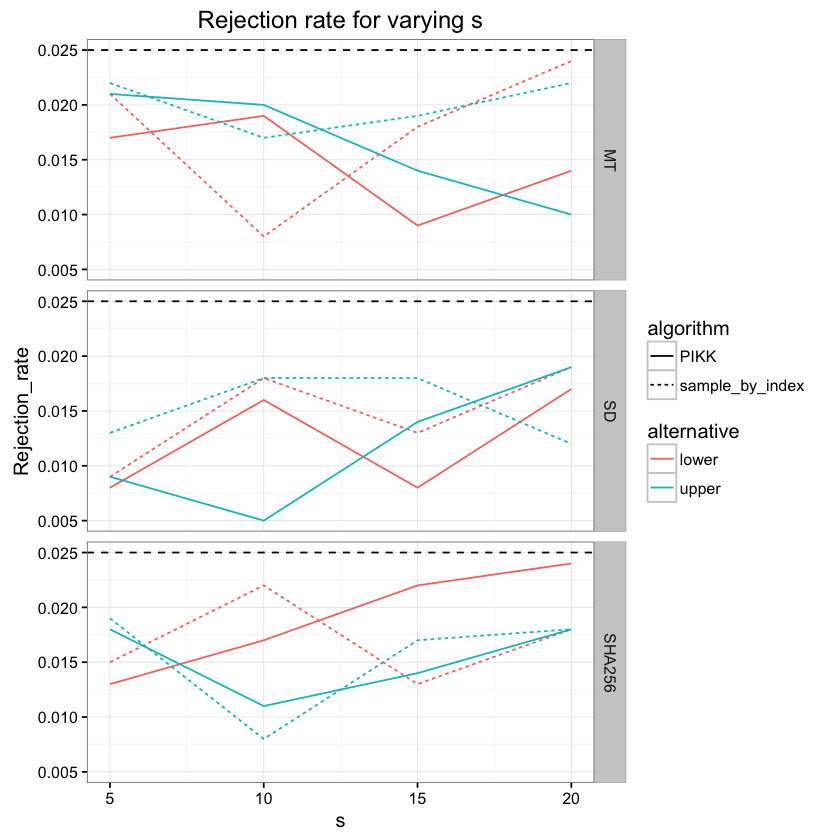

In [7]:
res2 <- res %>% group_by(prng, algorithm, s, alternative) %>% summarise("Rejection_rate" = mean(decision == "1"))
ggplot(res2, aes(x = s, y = Rejection_rate, color = alternative, linetype = algorithm)) + 
    geom_line() +
    facet_grid(prng~.) +
    geom_hline(yintercept = 0.025, linetype = "dashed") + 
    ggtitle("Rejection rate for varying s") +
    theme_bw()

In [14]:
rejects <- res %>% filter(decision != "None")

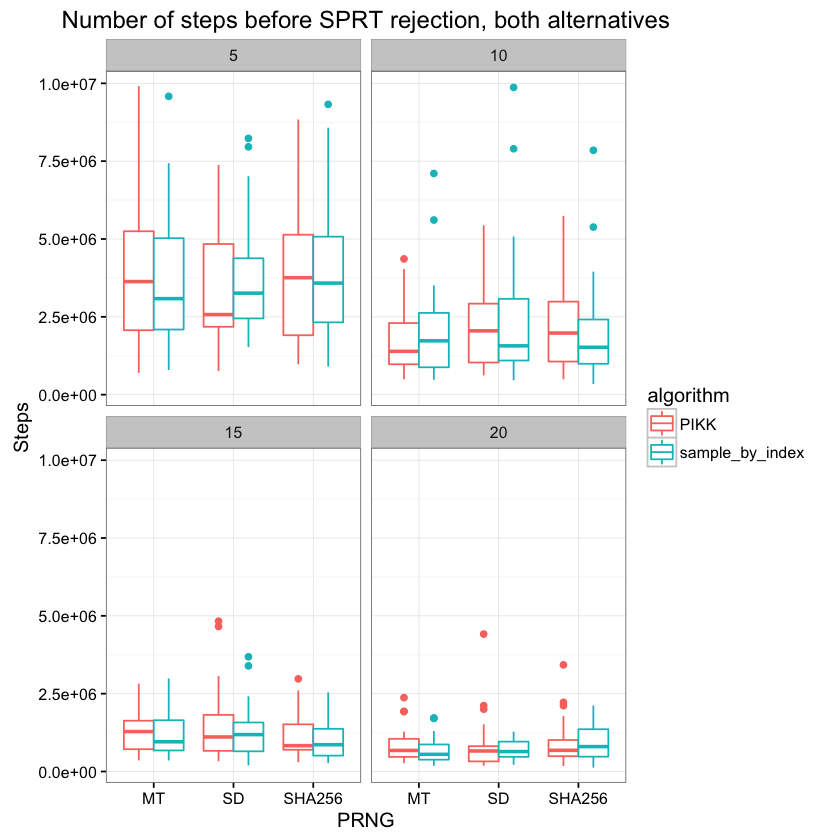

In [36]:
rejects %>% 
    ggplot(aes(x = prng, y= as.numeric(steps), color = algorithm)) + 
    geom_boxplot() +
    facet_wrap(~s, ncol=2) +
    xlab("PRNG") +
    ylab("Steps") +
    ggtitle("Number of steps before SPRT rejection, both alternatives") +
    theme_bw()

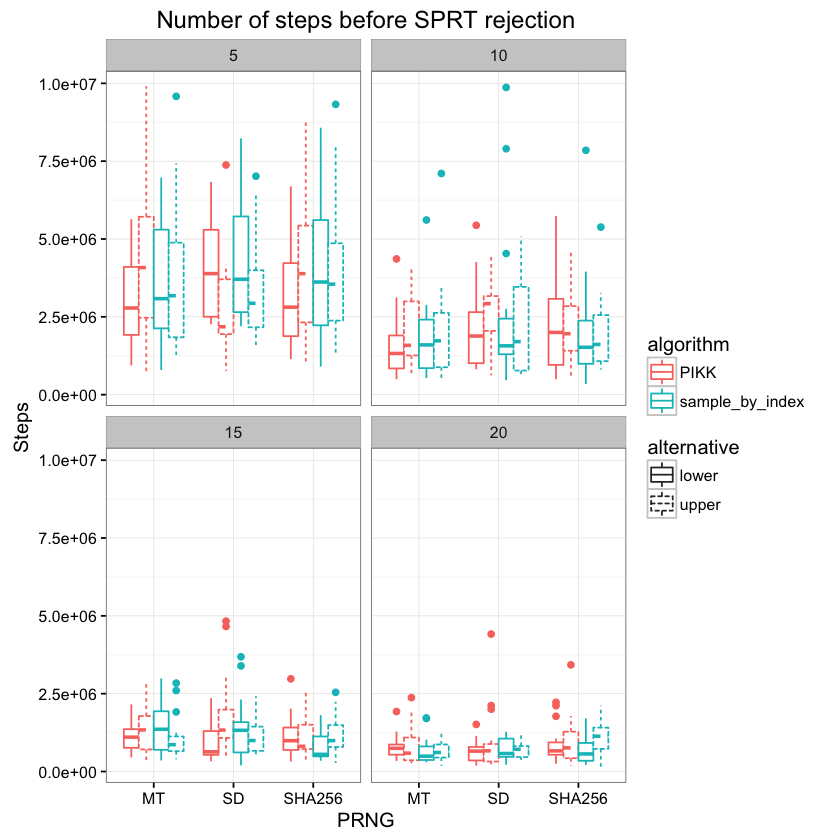

In [35]:
rejects %>% 
    ggplot(aes(x = prng, y= as.numeric(steps), color = algorithm, linetype = alternative)) + 
    geom_boxplot() +
    facet_wrap(~s, ncol=2) +
    xlab("PRNG") +
    ylab("Steps") +
    ggtitle("Number of steps before SPRT rejection") +
    theme_bw()

In [15]:
rejects %>% group_by(prng, algorithm, s, alternative) %>% 
    mutate(steps = as.numeric(steps)) %>%
    summarise("Mean steps" = mean(steps),
              "Median steps" = median(steps),
              "Min steps" = min(steps),
              "Max steps" = max(steps))

prng,algorithm,s,alternative,Mean steps,Median steps,Min steps,Max steps
MT,PIKK,5,lower,3000741.1,2783955.0,938075,5637137
MT,PIKK,5,upper,4634161.4,4082468.0,700835,9907296
MT,PIKK,10,lower,1549304.5,1323646.0,494383,4360243
MT,PIKK,10,upper,2000655.4,1584635.0,635902,4035744
MT,PIKK,15,lower,1164619.1,1104137.0,453202,2157373
MT,PIKK,15,upper,1373105.9,1336645.0,356346,2819244
MT,PIKK,20,lower,810953.9,746048.0,338748,1925859
MT,PIKK,20,upper,890767.6,589322.5,267921,2373335
MT,sample_by_index,5,lower,3783805.6,3084157.0,791481,6971259
MT,sample_by_index,5,upper,3683955.1,3176672.0,1229807,9582035
